#### Part1. 기본학습 - AI 핵심이론 및 활용 
    chp09 - 비지도 학습 : (2) 군집화 ~ K-Means, DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
#### K-Means clustering 
- 각 군집내 분산을 최소화하는 것을 목적으로 군집화를 진행함 
- 작업순서 : 군집수(K) 지정 > 각 K의 임의 기준점 설정 > K개 군집 생성 > 각 군집의 새로운 중심점 계산 > 각 군집내 분산 계산 --> 반복 
- Elbow method : 군집과 군집내 샘플 사이 거리의 제곱합(Inertia)가 급격히 감소하는 지점에서, 최적의 군집갯수(K)를 결정
---

In [2]:
## 데이터 생성 
X = np.array([
    [1,2], [1,4], [1,0], [10,2], [10,4], [10,0] 
    ])

## K-means clustering 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

print('labes = ', kmeans.labels_)
print('centers = ', kmeans.cluster_centers_)
print('-'*100)

new_vals = [[0,0], [12,3]]
print('predict vals = ', kmeans.predict(new_vals))

labes =  [0 0 0 1 1 1]
centers =  [[ 1.  2.]
 [10.  2.]]
----------------------------------------------------------------------------------------------------
predict vals =  [0 1]


---
#### DBSCAN
- KMeans가 거리기반 군집화인데 비해, DB스캔은 밀도(밀집도) 기반 군집화 알고리즘 
- 어떤 점을 기준으로 반경 e내에 점이 n개 이상 있으면 하나의 군집으로 인식 --> 점이 몰려있어 밀도가 높은 부분을 클러스터링 
- KMeans와 달리 군집수를 정하지 않아도 되고, 밀도기반 알고리즘이라 기하학적 형태의 군집도 잘 찾으며, 노이즈 포인트를 통해 이상치 검출이 가능한 장점 존재 
---

(750, 2) 
 [[ 0.34872081 -0.32220309]
 [ 0.4946184   0.97627442]
 [-0.70604499 -0.69988719]
 [-2.04051365 -0.81223347]
 [ 0.7535968   1.24052039]]


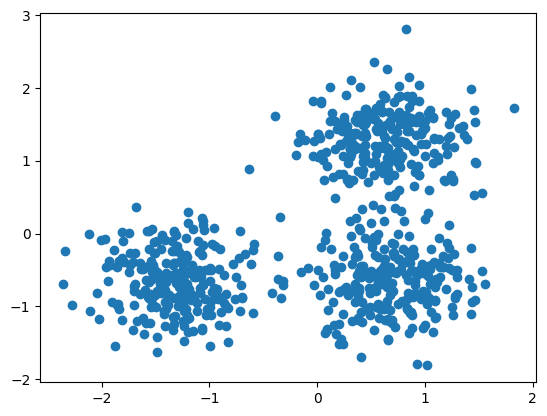

In [3]:
## 데이터 생성 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1,1], [-1,-1], [1,-1]]
X, labels_true = make_blobs(n_samples=750, 
                            centers=centers, 
                            cluster_std = 0.4, 
                            random_state=42
                            )
X = StandardScaler().fit_transform(X)    ## 표준화
print(X.shape, '\n', X[:5])

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
## DB scan clustering 
## labels_ 는 군집번호를 나타내며, -1은 노이즈를 의미함 
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps = 0.3, min_samples = 10).fit(X)     ## 군집의 반경(epsilon) = 3, 군집내 최소샘플수 = 10 
labels = db.labels_

## 클러스터, 노이즈 갯수 
n_clusters_ = len(set(labels))                                         ## set() : 중복을 제거하고 고유한 값들만을 포함하는 집합(set) 자료형을 생성
n_clusters_not_noise = len(set(labels)) - (1 if -1 in labels else 0)   ## 노이즈를 제외한 클러스터 갯수
n_noise_ = list(labels).count(-1)                                      ## count()를 사용할 수 있도록 리스트 형태로 변환, count(-1)은 '-1'인 것의 갯수를 카운트 

print('클러스터 갯수 = ', n_clusters_)
print('노이즈 제외 클러스터 갯수 = ', n_clusters_not_noise)
print('노이즈 갯수 = ', n_noise_)

클러스터 갯수 =  3
노이즈 제외 클러스터 갯수 =  2
노이즈 갯수 =  18


In [5]:
''''
실루엣 계수란? 
- 군집의 품질을 평가하는 지표. 데이터 포인트가 올바른 군집에 속해 있는지, 군집 간의 분리가 잘 이루어졌는지를 측정
- -1 ~ +1 사이의 값을 가짐. 
- 1에 가까운 값: 데이터 포인트가 잘 속한 군집에 포함되고, 다른 군집과 충분히 분리됨
- 0 근처의 값: 데이터 포인트가 경계선에 가까움
- -1에 가까운 값: 데이터 포인트가 잘못된 군집에 속해 있음
'''
metrics.silhouette_score(X, labels)

0.4481886875799739

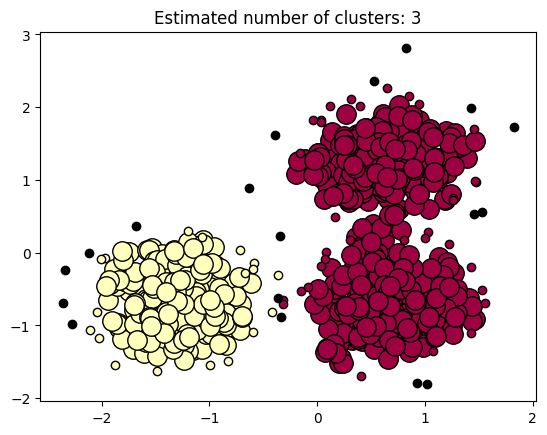

In [6]:
## 시각화 
# 레이블 유일값 설정하기
unique_labels = set(labels)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# 클러스터 구분 색상 설정하기
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# 시각화하기
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 레이블이 -1로 지정된 Noise Point는 검은색으로 지정하기
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

---
#### 실습: 고객세분화 (RFM 분석)

In [7]:
# data 
#!pip install openpyxl
import datetime
import datetime as dt 
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx', engine='openpyxl')
print(df.shape)
df.head()

(525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
# 결측치 확인 
df.isnull().sum().sort_values(ascending=False)

Customer ID    107927
Description      2928
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [9]:
# 수량, 가격이 0 이하 제외 
df = df[(df['Quantity']>0) & (df['Price']>0)]
# 중복 제외 
df = df.drop_duplicates()

print(df.shape)

(504731, 8)


In [10]:
'''
## RFM 구하기 
1. 기준일자 = 가장 최근 InvoiceDate + 1일 
2. 구매액 = 수량 x 가격 
3. 고객 아이디 기준으로 그룹화 하고, 
   - Recency = 고객의 가장 최근 구매일과 기준일자의 차이 (days) 
   - Frequency = 고객의 주문건수(Invoice 갯수) 
   - Monetary = 고객의 구매액 합계
'''
last_date = df.InvoiceDate.max() + datetime.timedelta(days=1)     
df['Amount'] = df['Quantity'] * df['Price'] 

rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate:(last_date - InvoiceDate.max()).days, 
                                    'Invoice' : lambda Invoice: Invoice.nunique(), 
                                    'Amount' : lambda Amount: Amount.sum()
                                    })

print(rfm.shape)
rfm.head()

(4312, 3)


,InvoiceDate,Invoice,Amount
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


In [11]:
## 컬럼명 변경 
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


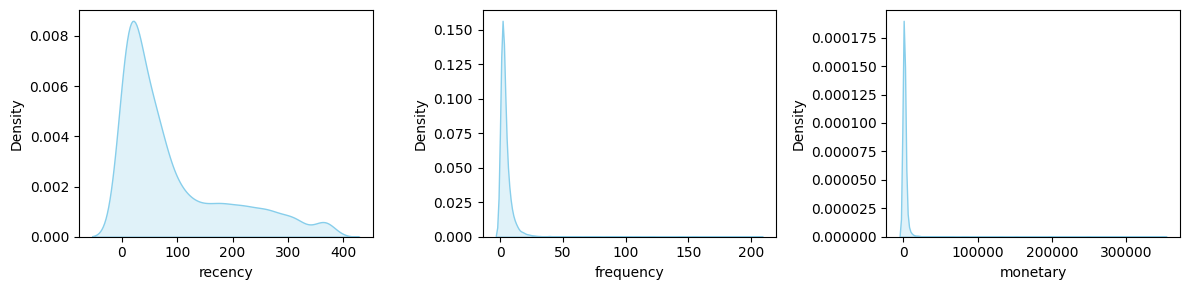

In [12]:
# 분포확인 
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

sns.kdeplot(rfm['recency'], ax=axes[0], color='skyblue', fill=True)
sns.kdeplot(rfm['frequency'], ax=axes[1], color='skyblue', fill=True)
sns.kdeplot(rfm['monetary'], ax=axes[2], color='skyblue', fill=True)
#axes[2].set_xlim(right=50000)

plt.tight_layout()
plt.show()

In [13]:
# RFM을 1~5점으로 scoring후 합산하여 고객점수(customer_score) 구하기
# (주의) 데이터에서 recency는 값이 적을수록, freqeuncy와 monetary는 값이 클수록 좋다는 점 주의 
# (주의) frequency는 중복된 값이 매우 많아 qcut()에서 오류 발생 --> rank() 사용시 중복 값들에도 순서를 매긴다 

rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['customer_score'] = rfm['recency_score'] + rfm['frequency_score'] + rfm['monetary_score']
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,customer_score
Customer ID,,,,,,,
12346.0,165,11,372.86,2,5,2,9
12347.0,3,2,1323.32,5,2,4,11
12348.0,74,1,222.16,2,1,1,4
12349.0,43,3,2671.14,3,3,5,11
12351.0,11,1,300.93,5,1,2,8


<Axes: xlabel='customer_score', ylabel='Density'>

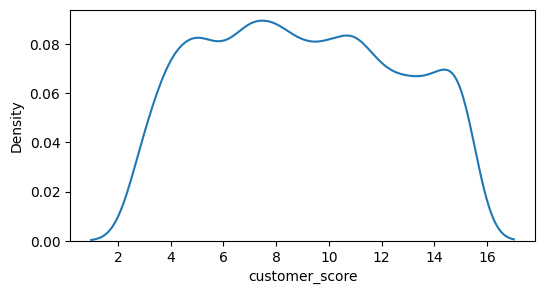

In [14]:
plt.figure(figsize=(6,3))
sns.kdeplot(rfm['customer_score'])

In [15]:
# 고객 등급 부여 : VIP, Gold, Silver, White 
def level(score): 
    if score > 12:
        return 'VIP'
    if 9 < score <= 12:
        return 'GOLD'
    if 5 < score <= 9:
        return 'SILVER'
    else: 
        return 'WHITE'
    
rfm['level'] = rfm['customer_score'].apply(lambda customer_score: level(customer_score))
rfm['level'].value_counts()

level
SILVER    1455
GOLD      1025
VIP        920
WHITE      912
Name: count, dtype: int64

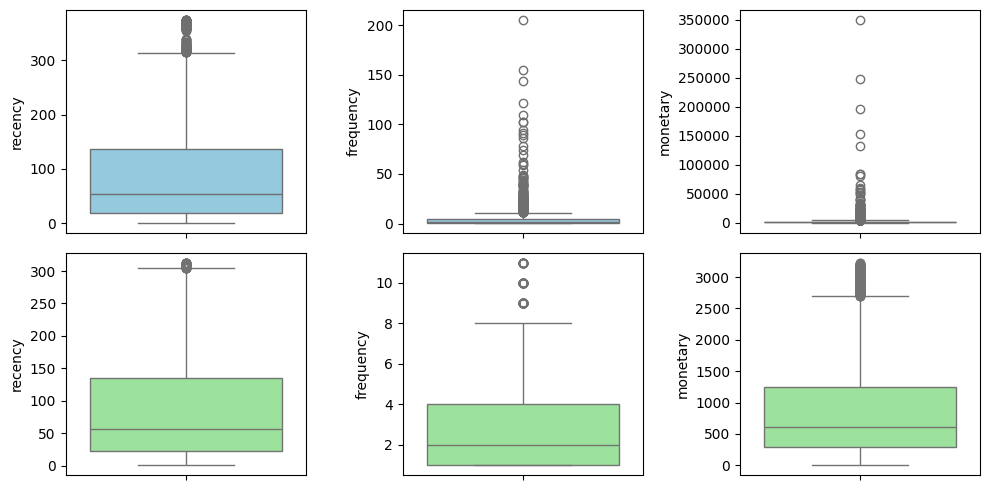

In [16]:
# IQR 기준 outlier 제거 
# Q1 - 1.5*IQR 미만, 또는 Q3 + 1.5*IQR 인 값들 제거 

def processing_outlier(df, col_nm):
    Q1 = df[col_nm].quantile(0.25)
    Q3 = df[col_nm].quantile(0.75)
    IQR = Q3 - Q1 
    df = df[(df[col_nm] >= Q1-1.5*IQR) & (df[col_nm]<= Q3+1.5*IQR)] 
    return df

rfm_tmp = rfm.copy()   # 원본데이터 보존 
rfm = processing_outlier(rfm, 'recency')
rfm = processing_outlier(rfm, 'frequency')
rfm = processing_outlier(rfm, 'monetary')

## 결과비교 
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

sns.boxplot(rfm_tmp['recency'], ax=axes[0,0], color='skyblue', fill=True)
sns.boxplot(rfm_tmp['frequency'], ax=axes[0,1], color='skyblue', fill=True)
sns.boxplot(rfm_tmp['monetary'], ax=axes[0,2], color='skyblue', fill=True)

sns.boxplot(rfm['recency'], ax=axes[1,0], color='lightgreen', fill=True)
sns.boxplot(rfm['frequency'], ax=axes[1,1], color='lightgreen', fill=True)
sns.boxplot(rfm['monetary'], ax=axes[1,2], color='lightgreen', fill=True)

plt.tight_layout()
plt.show()

[[ 0.9212283   3.66836645 -0.65156008]
 [-1.00622537 -0.39944379  0.61914885]
 [-0.16147716 -0.8514227  -0.85303709]
 ...
 [ 2.47984824 -0.8514227  -0.57917809]
 [ 0.2906416  -0.39944379  0.5831985 ]
 [-0.82775744  0.50451404  1.98602394]]


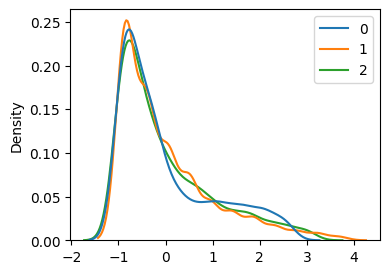

In [20]:
# 표준화 
from sklearn.preprocessing import StandardScaler

rfm_k = rfm[['recency', 'frequency', 'monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_k)

print(rfm_scaled)
plt.figure(figsize=(4,3))
sns.kdeplot(rfm_scaled)
plt.show()

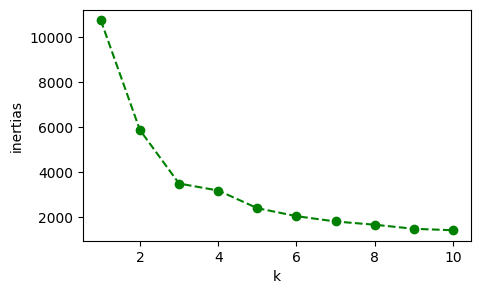

In [ ]:
# Kmeans clustering : elbow method로 최적 k 찾기 
from sklearn.cluster import KMeans

ks = range(1, 11)      ## k를 1부터 11까지 
inertias = []          ## inertia 값(클러스터 내 데이터 거리 합)

for k in ks: 
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_scaled)
    cluster = kc.fit_predict(rfm_scaled)
    inertias.append(kc.inertia_)

plt.figure(figsize=(5,3))    
plt.plot(ks, inertias, 'go--')         ## 'go--' : color = 'green', marker = 'o', line = '--'  
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

In [28]:
# 최적의 k=3을 적용하여, 고객 구분하기 
kc = KMeans(3, random_state=42)
kc.fit(rfm_scaled)

clusters_scaled = rfm_k.copy()
clusters_scaled['cluster_pred'] = kc.fit_predict(rfm_scaled)
clusters_scaled

,recency,frequency,monetary,cluster_pred
Customer ID,,,,
12346.0,165,11,372.86,2
12347.0,3,2,1323.32,0
12348.0,74,1,222.16,0
12349.0,43,3,2671.14,2
12351.0,11,1,300.93,0
...,...,...,...,...
18283.0,18,6,619.37,2
18284.0,67,1,461.68,0
18285.0,296,1,427.00,1


In [38]:
## 구분된 3개 집단의 RFM 분포 살펴보기 
rfm_k['cluster'] = clusters_scaled['cluster_pred']
rfm_k['level'] = rfm['level']
display(rfm_k.head())

rfm_k.groupby('cluster').agg({
                              'recency':['mean', 'min', 'max'], 
                              'frequency':['mean', 'min', 'max'], 
                              'monetary':['mean', 'min', 'max'], 
                              })

,recency,frequency,monetary,cluster,level
Customer ID,,,,,
12346.0,165,11,372.86,2,SILVER
12347.0,3,2,1323.32,0,GOLD
12348.0,74,1,222.16,0,WHITE
12349.0,43,3,2671.14,2,GOLD
12351.0,11,1,300.93,0,SILVER


recency           frequency             monetary                 
               mean  min  max      mean min max         mean    min       max
cluster                                                                      
0         49.327912    1  151  2.104407   1   7   583.536323  10.95  2253.220
1        220.480334  127  313  1.543504   1   8   415.932815   3.75  2622.481
2         41.268585    1  270  6.013189   1  11  1939.458984  97.40  3230.450

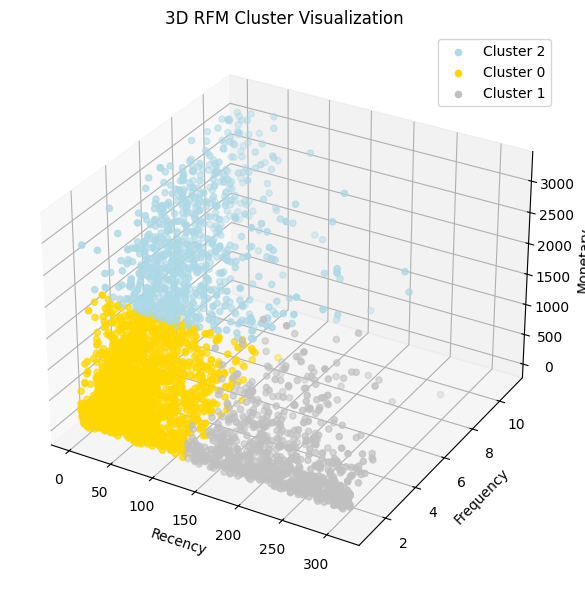

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 클러스터별 색상 설정
colors = {0: 'gold', 1: 'silver', 2: 'lightblue', 3: 'green'}  # 예시로 4개의 클러스터 색상

# 클러스터별 데이터 분포
for cluster in rfm_k['cluster'].unique():
    cluster_data = rfm_k[rfm_k['cluster'] == cluster]
    ax.scatter(cluster_data['recency'], 
               cluster_data['frequency'], 
               cluster_data['monetary'], 
               label=f'Cluster {cluster}', 
               color=colors.get(cluster, 'grey'))

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Cluster Visualization')
ax.legend()

plt.tight_layout()
plt.show()